In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

%matplotlib inline

# 最后一题

In [8]:
#定义语法内容
grammar = """
sentence = adj noun verb adj noun2
adj = adj_single 和 adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 静静地
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 
"""

In [93]:
# random.choice
# 1、划分语法结构
def build_grammar(grammar_str, split_sep='='):
    grammar_pattern = {}
    for sequence in grammar_str.split(sep='\n'):
        if sequence:
            statement, define = sequence.split('=')
            grammar_pattern[statement.strip()] = [
                i.split() for i in define.split('|')
            ]
    return grammar_pattern

In [96]:
grammar_pattern = build_grammar(grammar)

In [104]:
grammar_pattern

{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2']],
 'adj': [['adj_single', '和', 'adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['静静地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球']]}

In [111]:
#定义生成符合某声明的函数：
def generate(grammar_pattern, target):
    define = random.choice(grammar_pattern[target])
    tokens = [
        generate(grammar_pattern, i) if i in grammar_pattern else i
        for i in define
    ]
    return ''.join([i for i in tokens if i != 'null'])

In [117]:
generate(grammar_pattern, 'sentence')

'蓝色和好看的男人静静地看着蓝色和好看的皮球'

# Search Based Intelligence

In [21]:
#定义无向图
graph = {
    'A' :'B B B C', 
    'B' : 'A C', 
    'C' : 'A B D E',
    'D' : 'C G',
    'E' : 'C F',
    'F' : 'E',
    'G' : 'D H',
    'H' : 'G'
}
# networkx.Graph
# networkx.draw

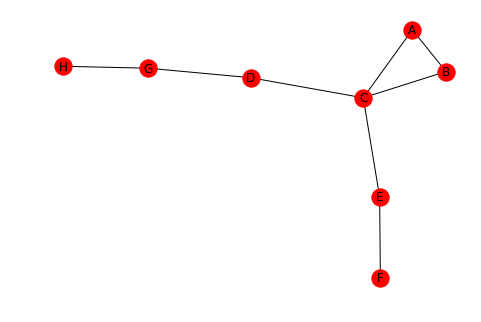

In [22]:
for i in graph:
    graph[i] = set(graph[i].split())

graph_net = nx.Graph(graph)
nx.draw(graph_net,with_labels=True)

## BFS 广度优先搜索

In [23]:
need_visited = ['A']
had_visited = []
# while need_visited:
while need_visited:
    node = need_visited.pop(0)
    if node in had_visited:
        print('{} has been seen'.format(node))
        continue
    else:
        print('\t I am looking for {}'.format(node))
        had_visited.append(node)
        need_visited += graph[node]

	 I am looking for A
	 I am looking for B
	 I am looking for C
A has been seen
C has been seen
	 I am looking for E
A has been seen
	 I am looking for D
B has been seen
	 I am looking for F
C has been seen
	 I am looking for G
C has been seen
E has been seen
D has been seen
	 I am looking for H
G has been seen


## DFS 深度优先搜索

In [24]:
need_visited = ['A']
had_visited = []
while need_visited:
    node = need_visited.pop()
    if node in had_visited:
        print('{} has been seen'.format(node))
        continue
    else:
        print('\t I am looking for {}'.format(node))
        had_visited.append(node)
        need_visited += graph[node]

	 I am looking for A
	 I am looking for C
	 I am looking for B
C has been seen
A has been seen
	 I am looking for D
C has been seen
	 I am looking for G
	 I am looking for H
G has been seen
D has been seen
A has been seen
	 I am looking for E
C has been seen
	 I am looking for F
E has been seen
B has been seen


## Repetition is the mother of evil

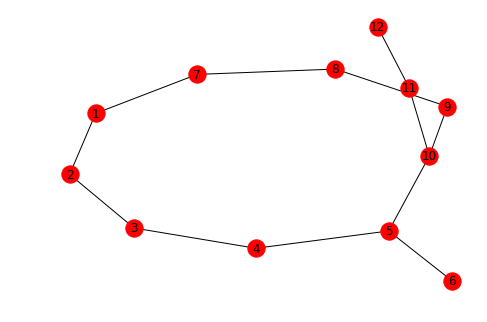

In [25]:
#定义无向长图
graph_long = {
    '1': '2 7',
    '2': '3',
    '3': '4',
    '4': '5',
    '5': '6 10',
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10',
    '10': '5 11',
    '11': '12',
    '12': '11',
}

for i in graph_long:
    graph_long[i] = graph_long[i].split()

graph_net = nx.Graph(graph_long)
nx.draw(graph_net, with_labels=True)

In [29]:
def search(graph, concat_func):
    had_seen = []
    need_visited = ['1']
    while need_visited:
        node = need_visited.pop(0)
        if node in had_seen:
            print('{} has been seen'.format(node))
            continue
        else:
            print('\t I am looking for {}'.format(node))

            had_seen.append(node)
            new_visited = graph[node]
            need_visited = concat_func(need_visited, new_visited)
            
def treat_new_discover_more_important(need_visited, new_visited):
    return new_visited + need_visited

def treat_already_discovered_more_important(need_visited, new_visited):
    return need_visited + new_visited

In [30]:
search(graph_long, treat_new_discover_more_important)

	 I am looking for 1
	 I am looking for 2
	 I am looking for 3
	 I am looking for 4
	 I am looking for 5
	 I am looking for 6
5 has been seen
	 I am looking for 10
5 has been seen
	 I am looking for 11
	 I am looking for 12
11 has been seen
	 I am looking for 7
	 I am looking for 8
	 I am looking for 9
10 has been seen


In [31]:
search(graph_long, treat_already_discovered_more_important)

	 I am looking for 1
	 I am looking for 2
	 I am looking for 7
	 I am looking for 3
	 I am looking for 8
	 I am looking for 4
	 I am looking for 9
	 I am looking for 5
	 I am looking for 10
	 I am looking for 6
10 has been seen
5 has been seen
	 I am looking for 11
5 has been seen
	 I am looking for 12
11 has been seen


In [32]:
from functools import partial
bfs = partial(search, concat_func=treat_already_discovered_more_important)
dfs = partial(search, concat_func=treat_new_discover_more_important)

In [33]:
bfs(graph_long)

	 I am looking for 1
	 I am looking for 2
	 I am looking for 7
	 I am looking for 3
	 I am looking for 8
	 I am looking for 4
	 I am looking for 9
	 I am looking for 5
	 I am looking for 10
	 I am looking for 6
10 has been seen
5 has been seen
	 I am looking for 11
5 has been seen
	 I am looking for 12
11 has been seen


# Mapping

In [35]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [87]:
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
#     SG : {GZ, SZ},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

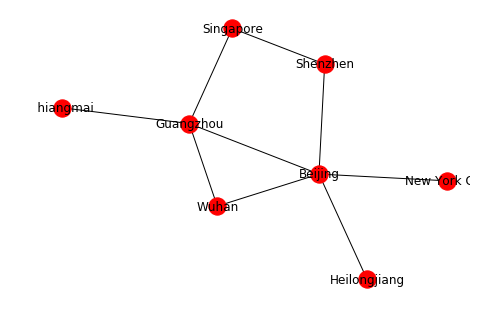

In [88]:
air_route_net = nx.Graph(air_route)
nx.draw(air_route_net, with_labels=True)

In [104]:
# path,paths
def search_destination(graph, start, destination):
    had_seen = []
    paths = [[start]]
    chosen_paths = []
    
    while paths:
        path = paths.pop(0)
        frontier = path[-1]
        if frontier in had_seen: 
            print(frontier) 
            continue

        for city in graph[frontier]:
            new_path = path + [city]
            if destination == city: return new_path
            
            paths.append(new_path)
        had_seen.append(frontier)

    return chosen_paths

In [105]:
search_destination(air_route, NY, CM)

['New York City', 'Beijing', 'Guangzhou', 'Chiangmai']

In [116]:
def draw_paths(cities): return ' ✈ '.join(cities)

In [117]:
draw_paths(search_destination(air_route, NY, CM))

'New York City ✈ Beijing ✈ Guangzhou ✈ Chiangmai'